# RFM Analysis

### Domain : Retail

## Table of Contents

#### 1. **Information**
    - Reason for Choosing this Dataset ?
    - Attribute Info
    - Objective
    - Questions Arising
    
#### 2. **Loading Dataset**
    - Importing packages
    - Reading Data
    - Shape of data
    - Dtype & Null values

#### 3. **Initial Exploratory Data Analysis, Data Cleansing & Data Preprocessing**
    - Descriptive Statistics
    - EDA (Phase 1)
    - Data Slicing
    - Missing values examination and data preparation
    - Feature Extraction
    - EDA (Phase 2)

#### 4. **RFM**
    - Forming RFM Table
    - Quantiles
    - Assigning RFM Scores
    - EDA (Phase 3)
    - Correlation Plot

#### 5. **Behaviour Analysis**
    - Best Customers
    - Big Spenders
    - Loyal Customers
    - Loyal Joes
    - New Comers
    - Lost Customers
    - Almost Lost Customers
    - Splurgers
    - Deadbeats
    - EDA (Phase 4)

#### 6. **K-Means Clustering**
    - Logarithmic Transformations
    - Normalization
    - EDA (Phase 5)
    - K-Means Implementation
    - Elbow Plot
    - K-Means reinitiation based on elbow plot
    - Clusters Impact on R, F and M
    - 3D Scatter Plot

#### 7. **Conclusion**

### Reason for Choosing this Dataset ?

- The Reason behind choosing this model is my Personal Interest to explore various Domains out there.

- RFM analysis is the key to understand Customer Behavior.

### RFM Customer segmentation :

   - **RECENCY (R)**: Time since last purchase.</b>
   - **FREQUENCY (F)**: Total number of purchases.
   - **MONETARY VALUE (M)**: Total monetary value.<b>

### Attribute Info :

- InvoiceNo : Purchase Invoice
- StockCode : Stock code derives a product identifier
- Description : Product name / description
- Quantity : Number of units customer opted for
- InvoiceDate : Purchase date / Date of invoice generation.
- UnitPrice : Price of Product
- CustomerID : Unique Indentifier for Customer
- Country : Country of Origin where Retail Outlet is Located

### Objective :

The goal of RFM Analysis is to segment/group customers based on their buying behavior. We need to understand the historical behavior of individual customers for each RFM factor. We then rank customers based on each individual RFM factor, and finally pull all the factors together to create RFM segments for targeted marketing. 

### Questions Arising :

- Can you identify your best customers?
- Do you know who your worst customers are?
- Do you know which customers you just lost, and which ones you’re about to lose?
- Can you identify loyal customers who buy often, but spend very little?
- Can you target customers who are willing to spend the most at your store?

### Loading Dataset

In [0]:
# Importing required Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data

df = pd.read_excel('retail.xlsx', header=0, parse_dates=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#attribute dtype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- The above results shows us that features with respective data types : 
    - (1) x datetime64
    - (2) x float64
    - (1) x int64
    - (4) x object

In [5]:
#Null value examination

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

- The above null value analysis gives us sum of total null values in given feature.
    - We can see that ***Description*** has 1454 NaN values.
    - We can see that ***CustomerID*** has 135080 NaN values.

### Data Processing, Data Cleansing and EDA

In [6]:
#descriptive stats

df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


- There are negative values in ***Quantity*** and ***UnitPrice*** which is quite bizzare. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

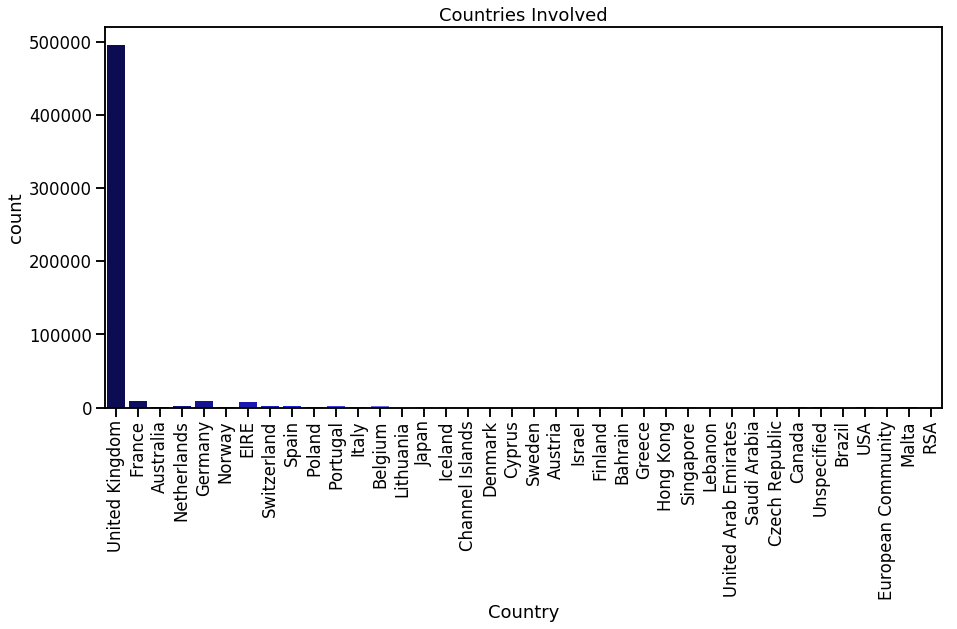

In [7]:
#country where retail store is located

plt.figure(figsize=(15,7))
sns.set_context('talk')
sns.countplot(df.Country, palette='seismic')
plt.title('Countries Involved')
plt.xticks(rotation=90)

- We got data of 38 countries which includes **North/South American, European, Middle East and other** countries.
- Also, 90% of data is from **UK** so we'll conduct our RFM analysis on UK. Also, other reason is we cannot perform RFM analysis on multiple regions because as country changes, the behavior of customers , currency, lifestyle, products, etc changes too.

In [8]:
#Slicing UK data

uk = df[df.Country == 'United Kingdom']
uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
#UK data shape

uk.shape

(495478, 8)

- We got 495478 examples of **UK**

In [10]:
#checking UK data missing values

uk.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

- Missing values in UK data is :
    - Description : 1454
    - CustomerID : 133600

In [11]:
#dropping null rows

uk = uk[pd.notnull(uk['CustomerID'])]
uk.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

  - **Why did we drop rows with null values ?**
  - Ans.: Because we've missing values in **CustomerID**, we cannot replace missing values of ID columns because that is a false approach, it can bias a data towards particular group of customers , which can lead to false analysis. 

In [12]:
#% negative values in UK dataset

print (round(len(uk[uk['Quantity'] < 0])/len(uk) * 100),'% Negative Values')

2 % Negative Values


- We got **2% of Negative values** in the UK dataset.

In [13]:
#slicing data 
#descriptive statistics of quanties above 0

uk = uk[uk.Quantity > 0]
uk[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,354345.000000,354345.000000
mean,12.048913,2.963793
std,190.428127,17.862067
min,1.000000,0.000000
25%,2.000000,1.250000
50%,4.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


- Let us only consider values which are Positive and focus on further analysis.
- Above descriptive statistics tells us that Min. & Max. Quantity is 1 & 80995 while UnitPrice has Min. & Max. 0 & 8142.75.
- We can observe that some customer has checked out with 80995 units of particular/single product but it is not necessary that it is more frequent customer because, let us assume that there was a stock clearance sale ran by store and the customer got to know it from advertises or marketing, which drove his attention towards our store and he opted out for the required product in bulk and as a result we could get such huge variation in data.

In [14]:
uk.shape

(354345, 8)

- In UK data (after cleaning) , we got 354345 examples for our RFM analysis.

In [0]:
#extracting new column

uk['Total_price'] = uk.Quantity * uk.UnitPrice

- We can do feature enginnering by taking product of No. of Quantities and Unit Price which will further helpful for Monetary Analysis.

In [16]:
#min and max invoice date

df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

- We have data ranging from **12/2010** to **12/2011** which is 1 year of information we got under roof.

In [17]:
#next day = Last invoice date + 1 day

import datetime as dt

next_day = df['InvoiceDate'].max() + dt.timedelta(1)
next_day

Timestamp('2011-12-10 12:50:00')

- We need to add a day to last date in out data.
- To understand this we need to revisit the defination of **Recency (R) , i.e, Time since last purchase**. We calculate Recency by subtracting current date with recorded date. The lesser the difference in days (lesser Gap), the recent was the customer found checking-in to our store. The bigger the difference, the larger is the gap since he last visited.
- Now, if we consider to subtract today's date with the customers who visited today, that will give us 0. Neutral value won't add any value to our Recency (R) analysis so we must add a day to current date.

### No. of Sales per day and per hour in a day

Text(0.5, 1.0, 'Sale Count per Hour')

<Figure size 432x288 with 0 Axes>

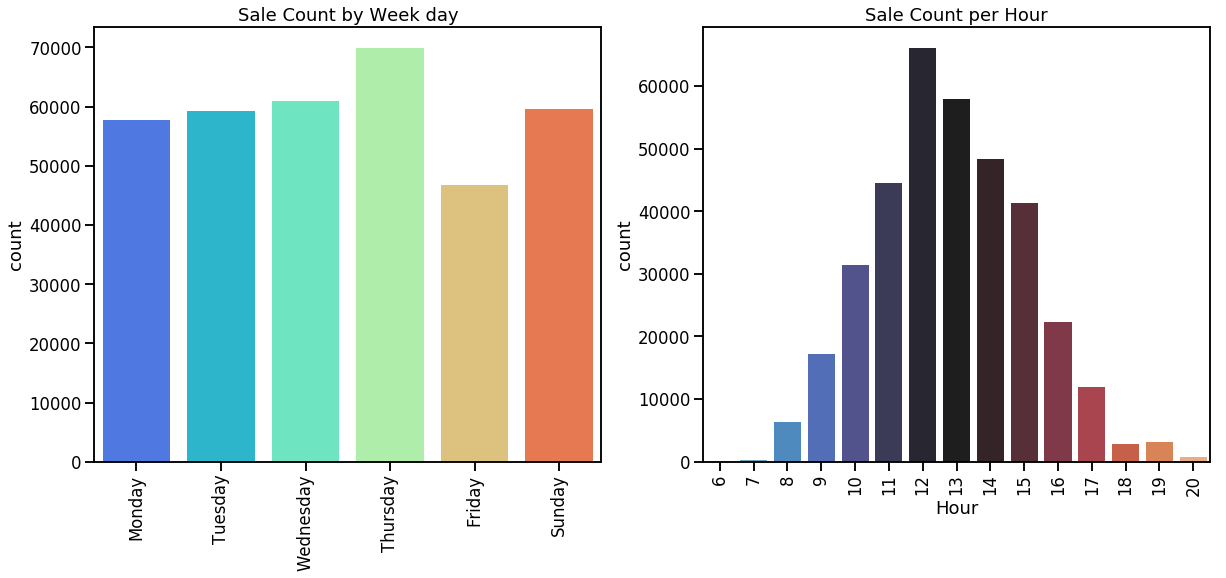

In [18]:
#EDA

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
plt.subplots_adjust(wspace=0.2, hspace=1)
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(sorted(uk['InvoiceDate'].dt.weekday_name, key=weekday.index), palette='rainbow')
plt.xticks(rotation=90)
plt.title('Sale Count by Week day')

plt.subplot(1,2,2)
sns.countplot(uk['InvoiceDate'].dt.hour, palette='icefire')
plt.xticks(rotation=90)
plt.xlabel('Hour')
plt.title('Sale Count per Hour')

- From above plot we can observe that most sale happens mostly on **Thursday and Wednesday**.
- While in single day, most sales occur tend to occur between **11.00 to 15.00 hours.**

### Percentage of Repeated VS One-Time Consumers

Text(0.5, 1.0, 'Reapeat VS One-Time Vistors')

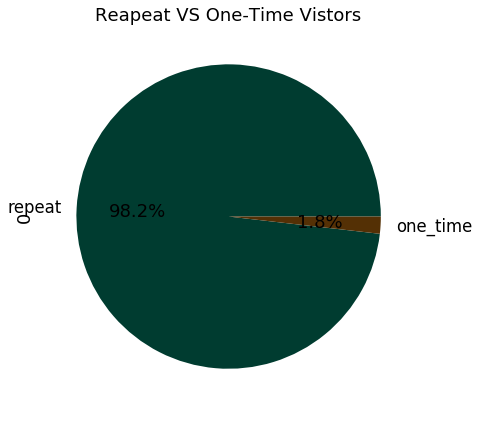

In [24]:
#one time visitor vs repeated visitor

plt.figure(figsize=(7,7))

repeat_vs_one_time = np.where(uk.CustomerID.value_counts()>1, 'repeat', 'one_time')
repeat_vs_one_time = pd.DataFrame(repeat_vs_one_time)
repeat_vs_one_time = repeat_vs_one_time[repeat_vs_one_time.columns[0]].value_counts()
repeat_vs_one_time.plot(kind='pie', autopct='%1.1f%%', colormap='BrBG_r')
plt.title('Reapeat VS One-Time Vistors')

- The Percentage count of repeated customer is 98.2 while one-time customers are 1.8%

### Most & Least purchased products

In [25]:
#most purchased products

products = uk.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False)
products.head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        76919
WORLD WAR 2 GLIDERS ASSTD DESIGNS     49182
JUMBO BAG RED RETROSPOT               41981
WHITE HANGING HEART T-LIGHT HOLDER    34648
ASSORTED COLOUR BIRD ORNAMENT         32727
POPCORN HOLDER                        28935
PACK OF 12 LONDON TISSUES             24337
BROCADE RING PURSE                    22711
PACK OF 72 RETROSPOT CAKE CASES       22465
Name: Quantity, dtype: int64

- We can see that **PAPER CRAFT , LITTLE BIRDIE, MEDIUM CERAMIC TOP STORAGE JAR, WORLD WAR 2 GLIDERS ASSTD DESIGNS, etc** are most purchased. 

- **Note** that most purchased product is not the most common product , remember we talked above about **Stock Clearance Sale** where a consumer purchases a sale/discounted product in bulk. These bulk purchase can fall into our **"Most Purchased Product"** category.

In [26]:
#least purchased products
products.tail(10)

Description
POTTING SHED SOW 'N' GROW SET          1
PURPLE CHUNKY GLASS+BEAD NECKLACE      1
PURPLE FRANGIPANI HAIRCLIP             1
GREEN PENDANT TRIPLE SHELL NECKLACE    1
RUBY GLASS CLUSTER EARRINGS            1
CAPIZ CHANDELIER                       1
AMBER BERTIE GLASS BEAD BAG CHARM      1
SCALLOP SHELL SOAP DISH                1
SET 10 CARDS HANGING BAUBLES 17080     1
CAKE STAND LACE WHITE                  1
Name: Quantity, dtype: int64

- Above are some least purchased products

### RFM

In [27]:
#Let us look at data again

uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [0]:
# Converting DateTime to proper format

uk['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

- Let's create RFM Table now , for that we'll group our data on **CustomerID** and aggregrate the data such that
    - Subtracting today's date with customer's recorded date will give us **Recency** of a Customer.
    - Total number of purchases will give us **Frequency**
    - And Summing up all the amount spent will give us **Monetary** 

In [0]:
#forming a RFM table

rfm_table = uk.groupby('CustomerID').agg({'InvoiceDate' : lambda x: (next_day - x.max()).days,
                                          'InvoiceNo' : lambda x: len(x),
                                          'Total_price' : lambda x: x.sum()
                                         })

In [30]:
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3921 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
InvoiceDate    3921 non-null int64
InvoiceNo      3921 non-null int64
Total_price    3921 non-null float64
dtypes: float64(1), int64(2)
memory usage: 122.5 KB


- By grouping our data on **CustomerID** we an see that we get **3921 unique customers** who visited our retail unit over the period of time.

In [0]:
# Changing our column names to R, F & M.

rfm_table.rename(columns={'InvoiceDate' : 'Recency',
                          'InvoiceNo' : 'Frequency',
                          'Total_price' : 'Monetary'}, inplace=True)

In [32]:
rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12747.0,2,103,4196.01
12748.0,1,4596,33719.73
12749.0,4,199,4090.88
12820.0,3,59,942.34


**For CustomerID 12346.0 :**

   - It's evident that Customer has visted our retail unit 326 days ago ,i.e, almost a **year** ago.
   - We can note that the Customer has generated invoice only **once in those 326 days.**
   - But, Monetary value is **77183.60**
   

**For CustomerID 12347.0 :**

   - It's evident that this particular Customer has visted our retail unit couple of days ago.
   - We can also note that the Customer has generated invoice **103 times**.
   - And, Monetary value is **4196.01**

In [33]:
#Let us look at what customer 12346 purchased

uk[uk['CustomerID'] == rfm_table.index[0]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6


- We can see that he puchased single product in bulk units maybe because it was a clearance sale.

In [34]:
#forming quantiles

'''quartile_temp = rfm_table.describe()[4:7]
quartile_temp'''

quartile = rfm_table.quantile(q=[0.25, 0.5, 0.75])
quartile

,Recency,Frequency,Monetary
0.25,18.0,17.0,300.04
0.50,51.0,41.0,651.82
0.75,143.0,99.0,1575.89


- Above we have added the table in Quartile range , i.e, 25% - 50% - 75%
- Below is the image to best describe Quartile Range.

![Image](https://www.lemnatec.com/wp-content/uploads/bell_curve_nir.jpg)

In [35]:
#converting them to dictionary

quartile = quartile.to_dict()
quartile

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89},
 'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 143.0}}

In [36]:
quartile['Recency'][0.25]

18.0

Lowest recency, highest frequency and monetary are our best customers :
- For recency a good customer would be a part of the lowest quartile designated as '1'. Lower recency states how recent customer shopped something in store.
- For frequency and monetary a good customer would be a part of the highest quartile here designated as '1'. This states that higher frequency/monetary.
- In short, R is inversely proportional to F & M.

In [37]:
#User defined functions

def Rscore(data, column, quartiles):
    if data <= quartiles[column][0.25]:
        return 1
    if data <= quartiles[column][0.5]:
        return 2
    if data <= quartiles[column][0.75]:
        return 3
    else:
        return 4
    
def FMscore(data, column, quartiles):
    if data <= quartiles[column][0.25]:
        return 4
    if data <= quartiles[column][0.5]:
        return 3
    if data <= quartiles[column][0.75]:
        return 2
    else:
        return 1
    
'''def Rscore(data):
    if data <= quartile_temp['Recency'][quart_idx[0]]:
        return 1
    if data <= quartile_temp['Recency'][quart_idx[1]]:
        return 2
    if data <= quartile_temp['Recency'][quart_idx[2]]:
        return 3
    else:
        return 4
    
def FMScore(data, col):
    if data <= quartile_temp[str(col)][quart_idx[0]]:
        return 4
    if data <= quartile_temp[str(col)][quart_idx[1]]:
        return 3
    if data <= quartile_temp[str(col)][quart_idx[2]]:
        return 2
    else:
        return 1'''

"def Rscore(data):\n    if data <= quartile_temp['Recency'][quart_idx[0]]:\n        return 1\n    if data <= quartile_temp['Recency'][quart_idx[1]]:\n        return 2\n    if data <= quartile_temp['Recency'][quart_idx[2]]:\n        return 3\n    else:\n        return 4\n    \ndef FMScore(data, col):\n    if data <= quartile_temp[str(col)][quart_idx[0]]:\n        return 4\n    if data <= quartile_temp[str(col)][quart_idx[1]]:\n        return 3\n    if data <= quartile_temp[str(col)][quart_idx[2]]:\n        return 2\n    else:\n        return 1"

- We had created user-defined functions here to assign respective scores based on which quartile data belongs to.

### Assigning RFM Scores

In [0]:
#Taking copy of RFM table

rfm_table_copy = rfm_table.copy()

In [0]:
#Applying Defined functions on specified columns
rfm_table_copy['r_quartile'] = rfm_table_copy['Recency'].apply(Rscore, args=('Recency', quartile))
rfm_table_copy['f_quartile'] = rfm_table_copy['Frequency'].apply(FMscore, args=('Frequency', quartile))
rfm_table_copy['m_quartile'] = rfm_table_copy['Monetary'].apply(FMscore, args=('Monetary', quartile))

#Resetting Index
rfm_table_copy.reset_index(inplace=True)

#Forming a new column which includes combined rfm score
rfm_table_copy['RFMscore'] = rfm_table_copy['r_quartile'].astype('str') + rfm_table_copy['f_quartile'].astype('str') + rfm_table_copy['m_quartile'].astype('str')

In [40]:
rfm_table_copy.head(10)

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMscore
0,12346.0,326,1,77183.60,4,4,1,441
1,12747.0,2,103,4196.01,1,1,1,111
2,12748.0,1,4596,33719.73,1,1,1,111
3,12749.0,4,199,4090.88,1,1,1,111
4,12820.0,3,59,942.34,1,2,2,122
5,12821.0,214,6,92.72,4,4,4,444
6,12822.0,71,46,948.88,3,2,2,322
7,12823.0,75,5,1759.50,3,4,1,341
8,12824.0,60,25,397.12,3,3,3,333
9,12826.0,3,91,1474.72,1,2,2,122


- Above we can see that we had nicely assigned RMF scores to respective customers.
- In total, we've 4 quartiles. **25% - 50% - 75%** and other quartile has all the values which are **outliers.**

### Distribution of Recency, Frequency and Monetary

Text(0.5, 1.0, 'Spread of Monetary')

<Figure size 432x288 with 0 Axes>

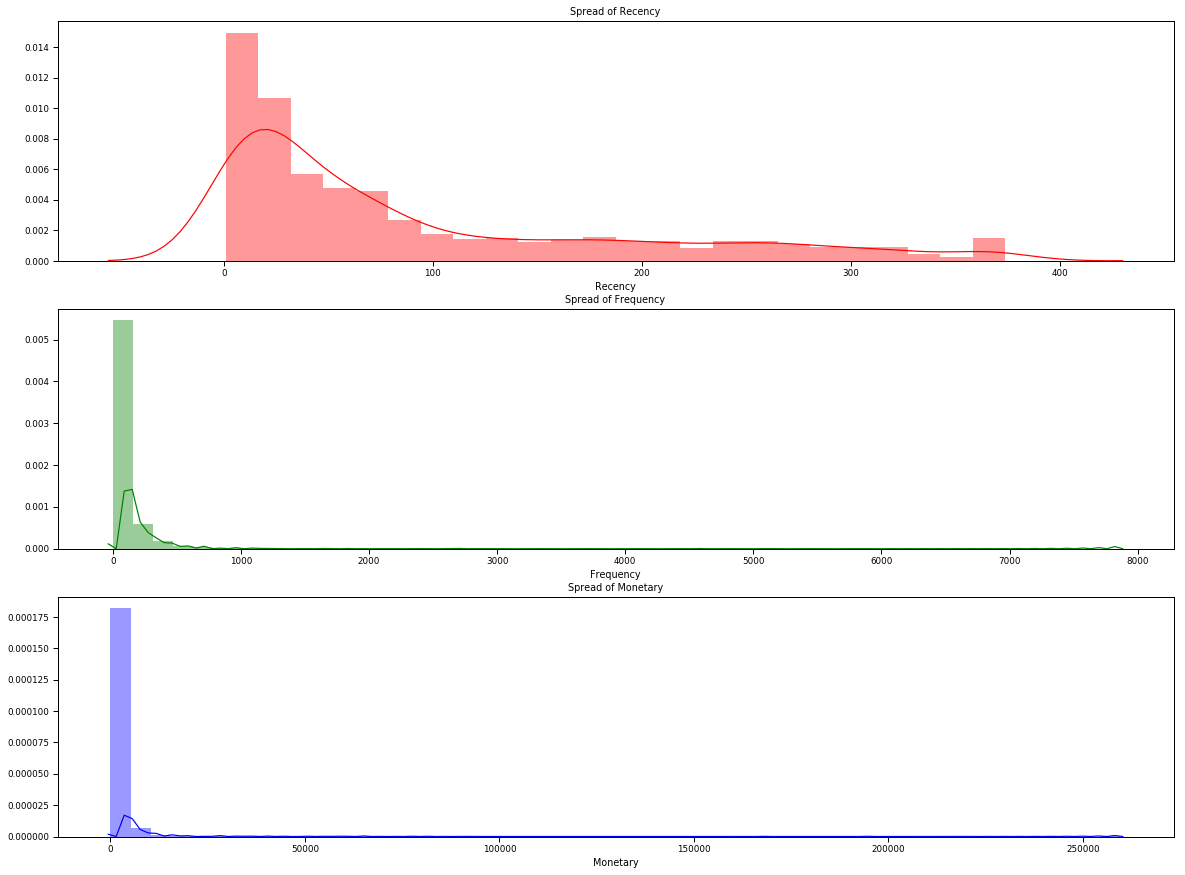

In [41]:
sns.set_context('paper')
plt.subplots_adjust(hspace=1, wspace=1)
plt.figure(figsize=(20,15))

plt.subplot(3,1,1)
sns.distplot(rfm_table_copy['Recency'], color='r')
plt.title('Spread of Recency')

plt.subplot(3,1,2)
sns.distplot(rfm_table_copy['Frequency'], color='g')
plt.title('Spread of Frequency')

plt.subplot(3,1,3)
sns.distplot(rfm_table_copy['Monetary'], color='b')
plt.title('Spread of Monetary')

- Above Viz. gives us brief idea on how our RFM data data is distributed. 

### Correlation heatmap

Text(0.5, 1.0, 'Pearson Correlation')

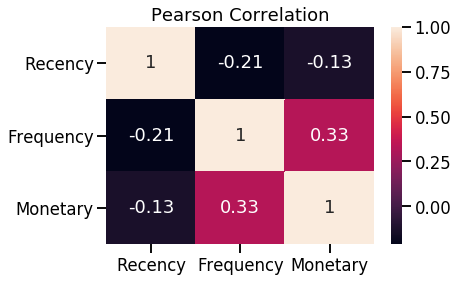

In [42]:
#correlation plot

sns.set_context('talk')
sns.heatmap(rfm_table_copy[['Recency', 'Frequency', 'Monetary']].corr(), annot=True)
plt.title('Pearson Correlation')

- Heatmaps are beautiful ways of representing Correlations.
- Frequency and monetary value are positively correlated with each other implying an increase in frequency implies increase in monetary value.
- Frequency and Recency are negatively correlated with each other.

### Targeting different customer segments

### (1) Best Customers

- These are the customers that bought recently, buy often and spend a lot. It’s likely that they will continue to do so.
- Since they already like you so much, consider marketing to them without price incentives to preserve your profit margin.
- Be sure to tell these customers about new products you carry, how to connect on social networks, and any loyalty programs or social media incentives you run.

In [43]:
rfm_table_copy[rfm_table_copy['RFMscore'] == '111'].sort_values('Monetary', ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMscore
3784,18102.0,1,431,259657.30,1,1,1,111
3315,17450.0,8,337,194550.79,1,1,1,111
3357,17511.0,3,963,91062.38,1,1,1,111
2767,16684.0,4,277,66653.56,1,1,1,111
903,14096.0,4,5111,65164.79,1,1,1,111
621,13694.0,4,568,65039.62,1,1,1,111
1772,15311.0,1,2379,60767.90,1,1,1,111
191,13089.0,3,1818,58825.83,1,1,1,111
2110,15769.0,7,130,56252.72,1,1,1,111
1580,15061.0,4,403,54534.14,1,1,1,111


In [0]:
rfm_table_copy['cust_type'] = np.where(rfm_table_copy['RFMscore'] == '111', 'Best_Cust', 'NA')

### (2) Big Spenders

- Big spenders have spent a lot of money over their lifetime as your customer.
- They trust you enough to invest a lot in your products.
- Considering marketing your most expensive products and top of the line models to this group.

In [45]:
rfm_table_copy[rfm_table_copy['m_quartile'] == 1].sort_values('Monetary', ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMscore,cust_type
3784,18102.0,1,431,259657.30,1,1,1,111,Best_Cust
3315,17450.0,8,337,194550.79,1,1,1,111,Best_Cust
2599,16446.0,1,3,168472.50,1,4,1,141,NA
3357,17511.0,3,963,91062.38,1,1,1,111,Best_Cust
2295,16029.0,39,242,81024.84,2,1,1,211,NA
0,12346.0,326,1,77183.60,4,4,1,441,NA
2767,16684.0,4,277,66653.56,1,1,1,111,Best_Cust
903,14096.0,4,5111,65164.79,1,1,1,111,Best_Cust
621,13694.0,4,568,65039.62,1,1,1,111,Best_Cust
1772,15311.0,1,2379,60767.90,1,1,1,111,Best_Cust


In [46]:
big_spenders = rfm_table_copy[(rfm_table_copy['cust_type'] == 'NA') & (rfm_table_copy['m_quartile'] == 1)] #['cust_type'].replace('NA', 'Big_spenders')
rfm_table_copy['cust_type'][big_spenders.index] = 'Big_Spenders'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### (3) Loyal Ones

- Anyone with a high frequency should be considered loyal. This doesn’t mean they have necessarily bought recently, or that they spent a lot, though you could define that with your R and M factors.

In [47]:
rfm_table_copy[rfm_table_copy['f_quartile'] == 1].sort_values('Frequency', ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMscore,cust_type
3594,17841.0,2,7847,40991.57,1,1,1,111,Best_Cust
903,14096.0,4,5111,65164.79,1,1,1,111,Best_Cust
2,12748.0,1,4596,33719.73,1,1,1,111,Best_Cust
1268,14606.0,1,2700,12156.65,1,1,1,111,Best_Cust
1772,15311.0,1,2379,60767.90,1,1,1,111,Best_Cust
191,13089.0,3,1818,58825.83,1,1,1,111,Best_Cust
320,13263.0,1,1677,7454.07,1,1,1,111,Best_Cust
1045,14298.0,8,1637,51527.30,1,1,1,111,Best_Cust
1561,15039.0,10,1502,19914.44,1,1,1,111,Best_Cust
3796,18118.0,11,1279,5653.82,1,1,1,111,Best_Cust


In [48]:
loyal_ones = rfm_table_copy[(rfm_table_copy['f_quartile'] == 1) & (rfm_table_copy['cust_type'] == 'NA')] #['cust_type'].replace('NA', 'Loyal_Cust')
rfm_table_copy['cust_type'][loyal_ones.index] = 'Loyal_Cust'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### (4) Loyal Joes

- Loyal Joes buy often, but don’t spend very much.
- Goal should be to increase the share of wallet you have from this customer.
- Send offers that require them to “Spend 100 rupees to save 20 rupees” and “Buy 4, Get 1 Free.” These offers create high hurdles that must be cleared to gain the reward, and will increase the amount these loyal customers spend with you.

In [49]:
rfm_table_copy[(rfm_table_copy['f_quartile'] == 1) & (rfm_table_copy['m_quartile'] == 4)].head()

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMscore,cust_type
3180,17254.0,5,112,272.44,1,1,4,114,Loyal_Cust


In [50]:
loyal_joes = rfm_table_copy[(rfm_table_copy['f_quartile'] == 1) & (rfm_table_copy['m_quartile'] == 4) & (rfm_table_copy['cust_type'] == 'Loyal_Cust')]['cust_type'].replace('Loyal_Cust', 'Loyal_Joes')
rfm_table_copy['cust_type'][loyal_joes.index] = 'Loyal_Joes'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### (5) New Comers

- New Spenders are new customers that spent a lot of money on their first order(s). This is the kind of customer you want to convert into a loyal, regular customer that loves your products and brand. Be sure to welcome them and thank them for making a first purchase, and follow it up with unique incentives to come back again.
- Consider branding the email with a special note from the CEO, and include a survey to ask about their experience

In [51]:
rfm_table_copy[rfm_table_copy['RFMscore'] == '141'].sort_values(by='Monetary', ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMscore,cust_type
2599,16446.0,1,3,168472.5,1,4,1,141,Big_Spenders
2271,16000.0,3,9,12393.7,1,4,1,141,Big_Spenders
2662,16532.0,18,4,6748.8,1,4,1,141,Big_Spenders
1683,15195.0,3,1,3861.0,1,4,1,141,Big_Spenders
1891,15473.0,14,11,1771.2,1,4,1,141,Big_Spenders


In [52]:
new_comers = rfm_table_copy[(rfm_table_copy['RFMscore'] == '141') & (rfm_table_copy['cust_type'] == 'Big_Spenders')]
rfm_table_copy['cust_type'] [new_comers.index] = 'New_comers'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### (6) Lost Customers

- Lost Customers used to buy frequently from you, and at one point they spent a lot with you, but they’ve stopped. Now it’s time to win them back.
- They might be lost to a competitor; they might not have need of your products anymore, or they might have had a bad customer service experience with you.

In [53]:
rfm_table_copy[rfm_table_copy['RFMscore'] == '411'].sort_values(by='Monetary', ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMscore,cust_type
195,13093.0,276,159,7832.470,4,1,1,411,Big_Spenders
3599,17850.0,372,297,5391.210,4,1,1,411,Big_Spenders
2139,15808.0,306,208,3734.970,4,1,1,411,Big_Spenders
1820,15379.0,169,194,3703.290,4,1,1,411,Big_Spenders
800,13952.0,218,137,3251.071,4,1,1,411,Big_Spenders
3351,17504.0,206,127,2997.030,4,1,1,411,Big_Spenders
22,12840.0,144,113,2726.770,4,1,1,411,Big_Spenders
3902,18260.0,173,134,2643.200,4,1,1,411,Big_Spenders
2946,16919.0,156,327,2596.450,4,1,1,411,Big_Spenders
1714,15235.0,218,143,2247.510,4,1,1,411,Big_Spenders


In [54]:
lost_cust = rfm_table_copy[(rfm_table_copy['RFMscore'] == '411') & (rfm_table_copy['cust_type'] == 'Big_Spenders')]
rfm_table_copy['cust_type'] [lost_cust.index] = 'Lost_cust'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### (7) Almost Lost Customers

- It has just been less time since they purchased. These customers might warrant more aggressive discounts so that you can win them back before it’s too late.
- It is much less expensive it is to keep customers compared to winning new ones

In [55]:
rfm_table_copy[rfm_table_copy['RFMscore'] == '311'].sort_values(by='Monetary', ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMscore,cust_type
2407,16180.0,100,162,10254.18,3,1,1,311,Big_Spenders
1500,14952.0,60,138,8099.49,3,1,1,311,Big_Spenders
2813,16745.0,87,357,7194.30,3,1,1,311,Big_Spenders
2743,16652.0,59,118,6773.97,3,1,1,311,Big_Spenders
3355,17509.0,58,366,6115.14,3,1,1,311,Big_Spenders
2992,16984.0,88,407,4481.35,3,1,1,311,Big_Spenders
2190,15874.0,64,120,4405.88,3,1,1,311,Big_Spenders
526,13555.0,74,136,4149.28,3,1,1,311,Big_Spenders
1847,15416.0,65,192,3984.32,3,1,1,311,Big_Spenders
218,13124.0,90,235,3866.33,3,1,1,311,Big_Spenders


In [56]:
almost_lost_cust = rfm_table_copy[(rfm_table_copy['RFMscore'] == '311') & (rfm_table_copy['cust_type'] == 'Big_Spenders')]
rfm_table_copy['cust_type'] [almost_lost_cust.index] = 'Almost_lost_cust'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### (8) Splurgers

- Splurgers combine a high Monetary Value with a low Frequency, which means they’ve spent a lot of money in just a few orders. Because they have the wealth and willingness to spend a lot with you, target high priced products with good margins at this group. 
- This group might also correspond with seasonal events or even just the typical buying cycle of your product’s wear.

In [57]:
rfm_table_copy[(rfm_table_copy['f_quartile'] == 4) & (rfm_table_copy['m_quartile'] == 1)].head(10)

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMscore,cust_type
0,12346.0,326,1,77183.60,4,4,1,441,Big_Spenders
7,12823.0,75,5,1759.50,3,4,1,341,Big_Spenders
226,13135.0,197,1,3096.00,4,4,1,441,Big_Spenders
578,13631.0,100,11,3070.42,3,4,1,341,Big_Spenders
676,13763.0,63,15,1714.96,3,4,1,341,Big_Spenders
865,14045.0,109,6,1659.75,3,4,1,341,Big_Spenders
938,14145.0,47,11,3742.20,2,4,1,241,Big_Spenders
1425,14828.0,197,17,2139.76,4,4,1,441,Big_Spenders
1466,14887.0,79,6,1862.00,3,4,1,341,Big_Spenders
1608,15098.0,182,3,39916.50,4,4,1,441,Big_Spenders


In [58]:
splurgers = rfm_table_copy[(rfm_table_copy['RFMscore'].apply(lambda x : x[-2:] == '41')) & (rfm_table_copy['cust_type'] == 'Big_Spenders')]
rfm_table_copy['cust_type'] [splurgers.index] = 'Splurgers'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### (10) Deadbeats

- These customers spent very little, bought very few times, and last ordered quite a while ago. They are unlikely to be worth much time, so put them in your general house list and consider a re-opt-in campaign.

In [59]:
rfm_table_copy[rfm_table_copy['RFMscore'] == '444'].sort_values(by='Monetary', ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMscore,cust_type
1991,15609.0,184,16,298.48,4,4,4,444,NA
3483,17678.0,264,16,298.11,4,4,4,444,NA
48,12881.0,276,7,298.00,4,4,4,444,NA
3375,17531.0,190,14,296.70,4,4,4,444,NA
665,13751.0,288,9,296.25,4,4,4,444,NA
3002,16998.0,150,4,295.00,4,4,4,444,NA
2082,15732.0,212,14,294.12,4,4,4,444,NA
12,12829.0,337,11,293.00,4,4,4,444,NA
2657,16526.0,172,15,290.36,4,4,4,444,NA
3328,17464.0,158,9,289.96,4,4,4,444,NA


In [60]:
deadbeats = rfm_table_copy[rfm_table_copy['RFMscore'] == '444']
rfm_table_copy['cust_type'][deadbeats.index] = 'Deadbeats'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
#replacing NA wit Other

rfm_table_copy['cust_type'].replace('NA', 'Other', inplace=True)

### Viz. depicting Count of different customers & their impact on Monetary value

Text(0.5, 1.0, 'Impact of Customer Types on Monetary')

<Figure size 432x288 with 0 Axes>

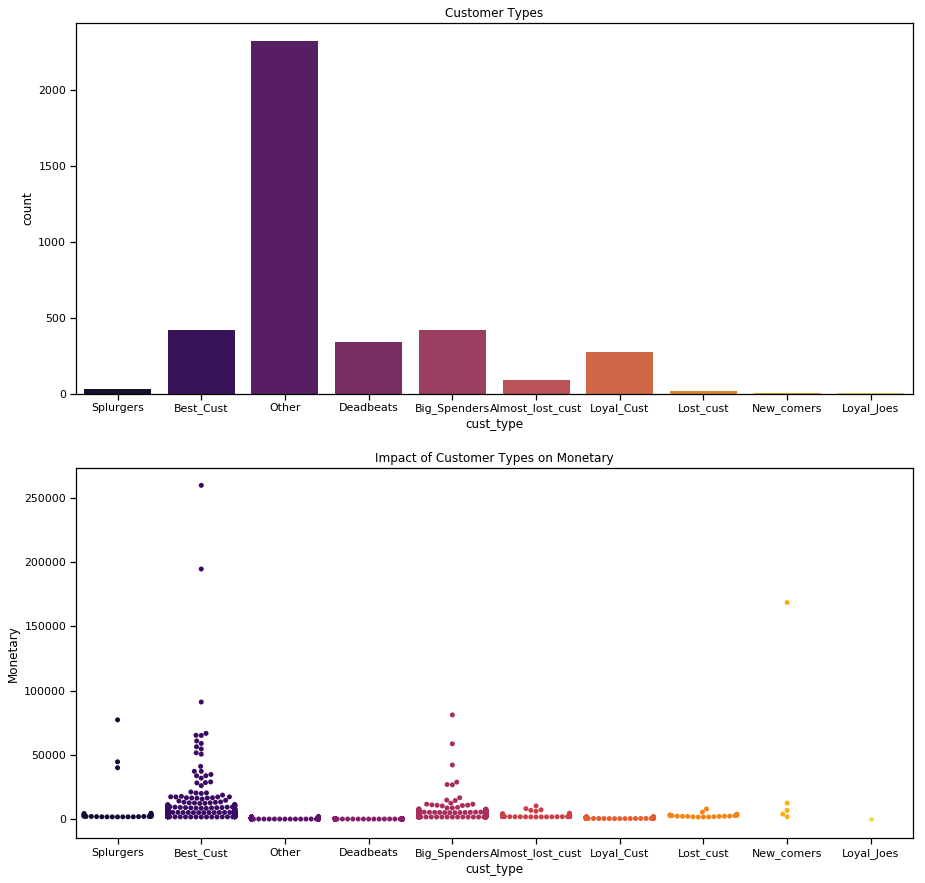

In [62]:
sns.set_context('notebook')
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
sns.countplot(rfm_table_copy['cust_type'], palette='inferno')
plt.xticks(rotation=0)
plt.title('Customer Types')

plt.subplot(2,1,2)
sns.swarmplot(rfm_table_copy['cust_type'], rfm_table_copy['Monetary'], palette='inferno')
plt.xticks(rotation=0)
plt.title('Impact of Customer Types on Monetary')

- We can see that "others" contribute more to the our grouping.
- While, Best Customers and Big spenders are having huge impact on Monetary value. 

### TreeMap

In [63]:
#installing squarify

!pip install squarify

In [64]:
import squarify

plt.figure(figsize = (10,30))
regions = rfm_table_copy['cust_type'].value_counts().to_frame()
regions['count_val']=regions.values
regions['percent']=regions['count_val']/(regions.values.sum())*100

<Figure size 720x2160 with 0 Axes>

In [65]:
#print % region

regions

,cust_type,count_val,percent
Other,2326,2326,29.660801
Big_Spenders,419,419,5.343025
Best_Cust,416,416,5.304769
Deadbeats,342,342,4.361132
Loyal_Cust,272,272,3.468503
Almost_lost_cust,91,91,1.160418
Splurgers,29,29,0.369804
Lost_cust,20,20,0.255037
New_comers,5,5,0.063759
Loyal_Joes,1,1,0.012752


Text(0.5, 1.0, 'Treemap of Main Category')

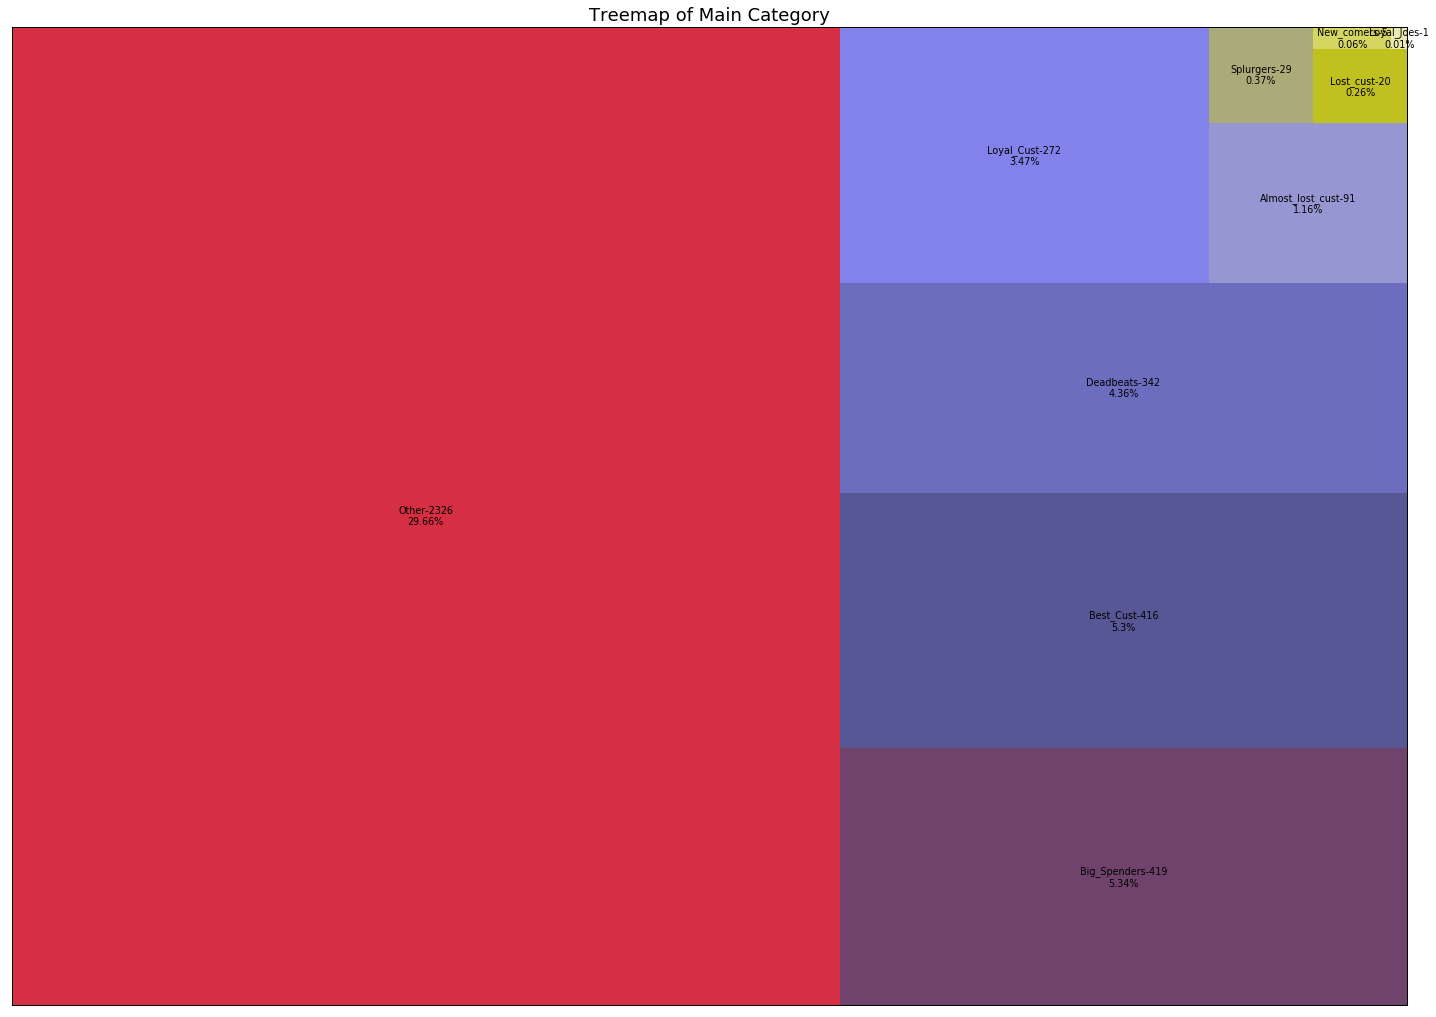

In [66]:
#treemap

sns.set_context('paper')
plt.figure(figsize=(25,18))
squarify.plot(sizes = regions["cust_type"].values, label = (regions.index+'-'+regions.count_val.astype(str)+'\n'+regions.percent.round(2).astype(str))+'%',
              color = sns.color_palette("gist_stern", 10), alpha = 0.9)
plt.xticks([])
plt.yticks([])
plt.title("Treemap of Main Category", fontsize = 18)

- The Above treemap shows how specific customer segement is contributing to us.
- By analysing the map, we can make targeted offers, discounts, etc on specific group of customers. That will help us further analyze how they are adding value to our business.

In [67]:
#dropping examples with 0 monetary

rfm_table_copy[rfm_table_copy['Monetary'] == 0]

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMscore,cust_type
314,13256.0,14,1,0.0,1,4,4,144,Other


In [0]:
rfm_table_copy.drop(rfm_table_copy.index[314], inplace=True)

### Log Transformation & Normalization

In [69]:
#Log transformation

rfm_table_log = np.log1p(rfm_table_copy[['Recency', 'Frequency', 'Monetary']])
rfm_table_log = pd.concat([rfm_table_copy['CustomerID'], rfm_table_log], axis=1)
rfm_table_log.set_index(['CustomerID'], inplace=True)
rfm_table_log.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.789960,0.693147,11.253955
12747.0,1.098612,4.644391,8.342128
12748.0,0.693147,8.433159,10.425868
12749.0,1.609438,5.298317,8.316760
12820.0,1.386294,4.094345,6.849427
12821.0,5.370638,1.945910,4.540312
12822.0,4.276666,3.850148,6.856336
12823.0,4.330733,1.791759,7.473353
12824.0,4.110874,3.258097,5.986753


- We need to do Log Transformation since values of each feature has outliers. And Outliers can affect our clustering process.

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = rfm_table_log.columns

norm_df = scaler.fit_transform(rfm_table_log[['Recency', 'Frequency', 'Monetary']])
norm_df = pd.DataFrame(data=norm_df, columns=cols, index=rfm_table_log.index)
norm_df.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.464133,-2.403455,3.785914
12747.0,-2.036648,0.732518,1.444280
12748.0,-2.339215,3.739539,3.119983
12749.0,-1.655459,1.251518,1.423880
12820.0,-1.821974,0.295964,0.243880
12821.0,1.151226,-1.409178,-1.613065
12822.0,0.334881,0.102153,0.249436
12823.0,0.375228,-1.531523,0.745629
12824.0,0.211164,-0.367739,-0.449865


- We need to Scale our data and we will use Sklearn's StandardScaler for that.

Text(0.5, 1.0, 'Spread of Log. Monetary')

<Figure size 432x288 with 0 Axes>

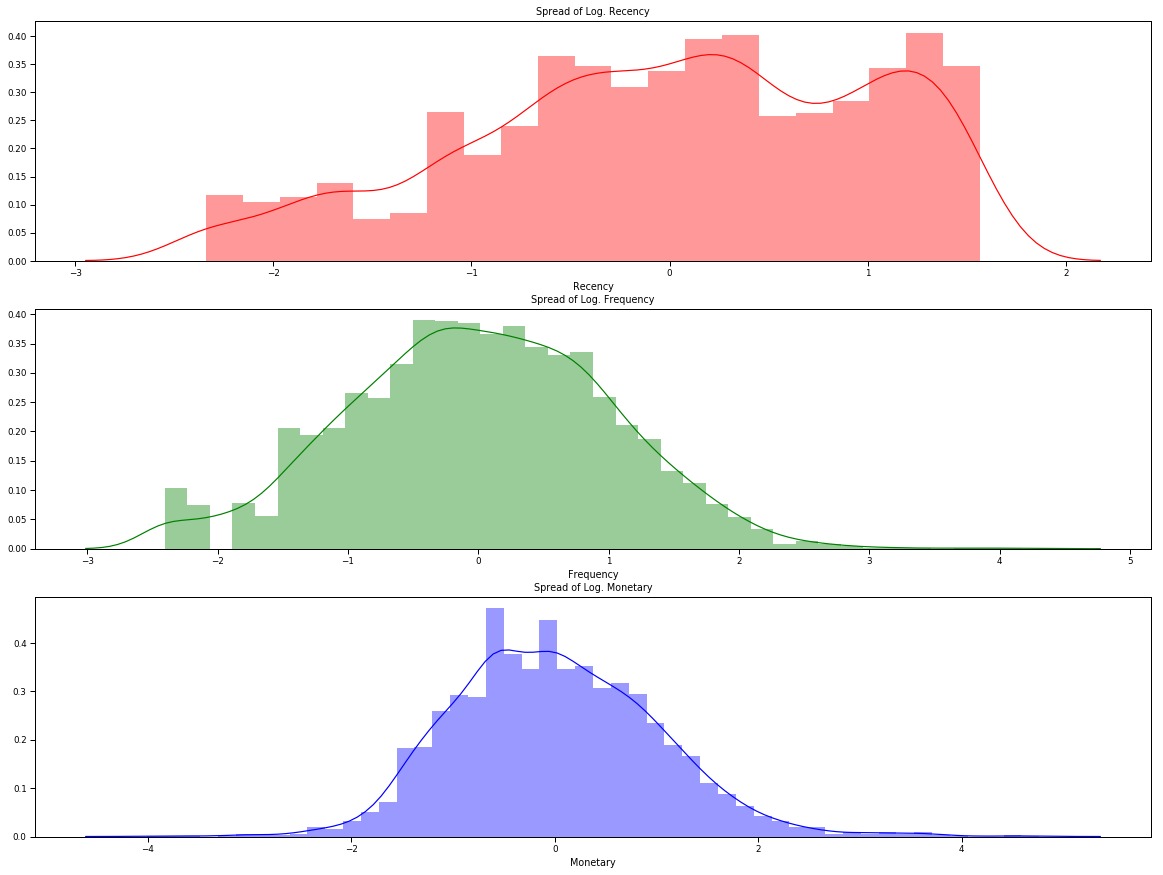

In [71]:
sns.set_context('paper')
plt.subplots_adjust(hspace=1, wspace=1)
plt.figure(figsize=(20,15))

plt.subplot(3,1,1)
sns.distplot(norm_df['Recency'], color='r')
plt.title('Spread of Log. Recency')

plt.subplot(3,1,2)
sns.distplot(norm_df['Frequency'], color='g')
plt.title('Spread of Log. Frequency')

plt.subplot(3,1,3)
sns.distplot(norm_df['Monetary'], color='b')
plt.title('Spread of Log. Monetary')

- Above is a viz. of distribution of R, F & M after Log Transformation & Scaling.

### K-Means Clustering

- We'll Initialize K-means with K clusters.
- By Intializing K-means we'll get **Sum of Squared Error (SSE).**
- SSE is the sum of the squared differences between each observation and its group's mean.

In [0]:
#K means implementation

from sklearn.cluster import KMeans, MiniBatchKMeans

k = np.arange(1,15)
sse = []

for i in k:
    model = MiniBatchKMeans(i)
    model.fit(norm_df)
    sse.append(model.inertia_/100)

In [73]:
cluster = pd.DataFrame({"Number of Clusters": k , "Error":sse})
cluster

,Number of Clusters,Error
0,1,117.800016
1,2,61.430197
2,3,48.517140
3,4,39.349763
4,5,33.700644
5,6,31.020620
6,7,28.778009
7,8,25.678658
8,9,24.284725
9,10,22.348594


Text(4, 40, 'Possible Clusters')

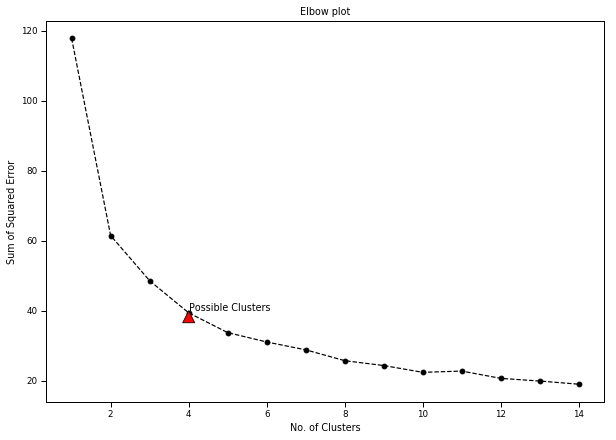

In [77]:
#elbow plot

plt.figure(figsize=(10,7))
plt.plot(cluster['Number of Clusters'], cluster['Error'], marker="o", linestyle="--" , c="black")
plt.title("Elbow plot")
plt.xlabel('No. of Clusters')
plt.ylabel('Sum of Squared Error')
plt.annotate(s='Possible Clusters', xy=(4, 40), arrowprops=dict(facecolor='r', shrink=0.1))

- The above **Elbow Plot** elaborates optimum number of clusters.
- We can consider **4** as we see after 4 the plot is quite flat with mimimal change / variation.
- Now we'll initialize K-means on 4 clusters and iterate for 200 times.

In [0]:
#execution of k-means

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=200, n_init=10)
kmeans.fit(norm_df)
labels = kmeans.labels_

In [79]:
#assigning labels to rfm table
#groupby cluster and aggregate it with average

rfm_k4 = rfm_table_copy.assign(Cluster=labels)

grouped_rfm = rfm_k4.groupby('Cluster').agg({'Recency':'mean',
                                             'Frequency': 'mean',
                                             'Monetary': ['mean','count']}).round(2)

grouped_rfm

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         20.34     38.04   583.21   790
1        184.46     14.93   290.90  1260
2         93.98     82.18  1481.42  1102
3         12.27    279.83  6313.27   768

- Above we had assigned Cluster labels to our RFM table.
- Then we group by cluster and aggregate to find Average of R, F & M for each cluster along with its Size.

Text(0.5, 1.0, 'Impact of Specific Cluster on Frequency')

<Figure size 432x288 with 0 Axes>

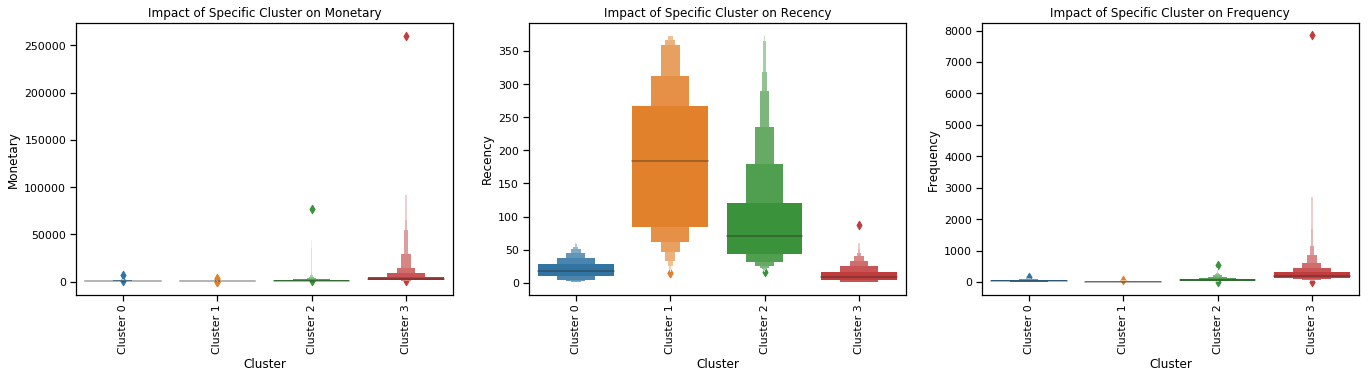

In [80]:
#examining Clusters and their impact on R, F & M

sns.set_context('notebook')
plt.subplots_adjust(hspace=0.5, wspace=0.7)
plt.figure(figsize=(23,5))

plt.subplot(1,3,1)
sns.boxenplot(rfm_k4['Cluster'], rfm_k4['Monetary'])
plt.xticks(ticks=[0,1,2,3], labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], rotation=90)
plt.title('Impact of Specific Cluster on Monetary')

plt.subplot(1,3,2)
sns.boxenplot(rfm_k4['Cluster'], rfm_k4['Recency'])
plt.xticks(ticks=[0,1,2,3], labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], rotation=90)
plt.title('Impact of Specific Cluster on Recency')

plt.subplot(1,3,3)
sns.boxenplot(rfm_k4['Cluster'], rfm_k4['Frequency'])
plt.xticks(ticks=[0,1,2,3], labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], rotation=90)
plt.title('Impact of Specific Cluster on Frequency')

#### Observations :


 - **Cluster 3** is highly affecting our Monetary value and Frequency and also they are recent, we can say the Cluster 3 contains our **Big Spenders** to which we can target expensive products.


 - **Cluster 2** is decent, its affect on Monetary value is good. We can provide them reasonable discounts and offers to keep them involved in purchase activity. Most of the customers have bad Recency so we can try to get them again before we tend to lose them. Although, They are our **Best Customers.**


 - **Cluster 1** is interesting. Their recency varies from best to bad. They don't spend much. They are combination of **Loyal Joes, Almost Lost Customers & Lost Customers**. We can try to give them good discounts / attractive offers pushing them to spend more.


 - **Cluster 0** contains our **Loyal Customers** their recency is very nice, they don't spend much so we'll have to provide them good discounts & attractive offers.

In [81]:
rfm_table_log = rfm_table_log.assign(Cluster=labels)
rfm_table_log.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,5.789960,0.693147,11.253955,2
12747.0,1.098612,4.644391,8.342128,3
12748.0,0.693147,8.433159,10.425868,3
12749.0,1.609438,5.298317,8.316760,3
12820.0,1.386294,4.094345,6.849427,0


- Above table helps us find out which **Customer** belongs to which **Cluster.**

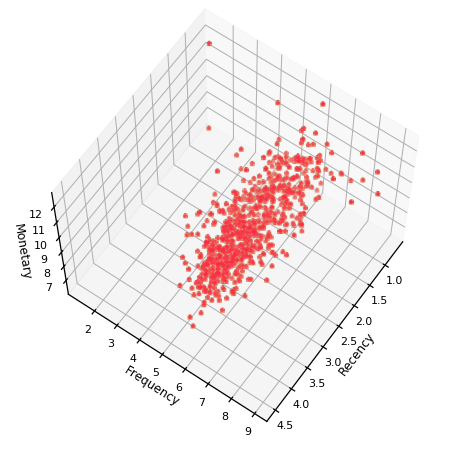

In [82]:
#3D plot

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
for c, m, zl, zh in [('#CD9575', 'o', 0, 0), ('#EA7E5D', '^', 0, 0), ('#FC2847', '+', 0, 0)]:
    xs = rfm_table_log[rfm_table_log['Cluster'] == 3]['Recency']
    ys = rfm_table_log[rfm_table_log['Cluster'] == 3]['Frequency']
    zs = rfm_table_log[rfm_table_log['Cluster'] == 3]['Monetary']
    #ax.scatter(xs, ys, zs, marker=m, depthshade=True, c=c)
    ax.scatter(xs, ys, zs, marker=m, c=c)
    
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.view_init(65, 35)
plt.show()

### Conclusion :

- **By this we conclude our RFM Analysis. We cannot neglect any cluster because they are our source of revenue. We must focus on providing them best offers / discounts to Cluster 0, Cluster 1 and Cluster 2. While Cluster 3 has big spenders to which we can target marketing our Top of the Line (new) product(s). While to Cluster 0, Cluster 1 and Cluster 2 we must provides "Buy x units, get y units free" offers to let them spend more.**